In [67]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import plotly.express as px
import matplotlib.animation as animation

In [6]:
pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2936 sha256=736099b523d2210518eaf8adc2e71cb2772e51224a93a773f422990a3d33cb71
  Stored in directory: /home/jovyan/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 6.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 66.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
path = 'thermal data.xlsx'
df =pd.read_excel(path,
                  engine = 'openpyxl'
                 )
df.head(2)

,TimeStemp,camA400IR->tandem1.Min,TimeStemp.1,camA400IR->tandem1.Max,TimeStemp.2,camA400IR->tandem1.Avg
0,13:13:44.800000,18.7,13:13:44.800000,24.7,13:13:44.800000,20.4
1,13:13:45.500000,18.9,13:13:45.500000,23.8,13:13:45.500000,20.4


In [9]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 6.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16960 entries, 0 to 16959
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TimeStemp                16960 non-null  object 
 1   camA400IR->tandem1.Min   16960 non-null  float64
 2   TimeStemp.1              16960 non-null  object 
 3   camA400IR->tandem1.Max   16960 non-null  float64
 4   TimeStemp.2              16960 non-null  object 
 5   camA400IR->tandem1.Avg   16960 non-null  float64
dtypes: float64(3), object(3)
memory usage: 795.1+ KB


In [13]:
df.drop(['TimeStemp', 'TimeStemp.2', ],
        axis = 1,
        inplace = True
        )

In [14]:
df.rename(columns={'camA400IR->tandem1.Min ' : 'TempMin', 'camA400IR->tandem1.Max ' : 'TempMax', 'camA400IR->tandem1.Avg ' : 'TempAvg' , 'TimeStemp.1' : 'Time' ,},
          inplace = True
         )

In [15]:
df = df[['Time', 'TempMin', 'TempAvg', 'TempMax' ]]

In [16]:
df.head(2)

,Time,TempMin,TempAvg,TempMax
0,13:13:44.800000,18.7,20.4,24.7
1,13:13:45.500000,18.9,20.4,23.8


In [39]:
indexNames = df[ (df['TempMax'] >= 10) & (df['TempMax'] <= 90) ].index
df.drop(indexNames , inplace=True)

In [40]:
all(isinstance(column, str) for column in df.columns)

True

In [41]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.1


In [42]:
df.sort_values(['Time'], ascending=True, axis=0, inplace=True)

In [43]:
df.head(2)

,Time,TempMin,TempAvg,TempMax
2473,13:22:00.400000,18.9,21.5,239.2
2474,13:22:00.500000,18.9,22.3,242.4


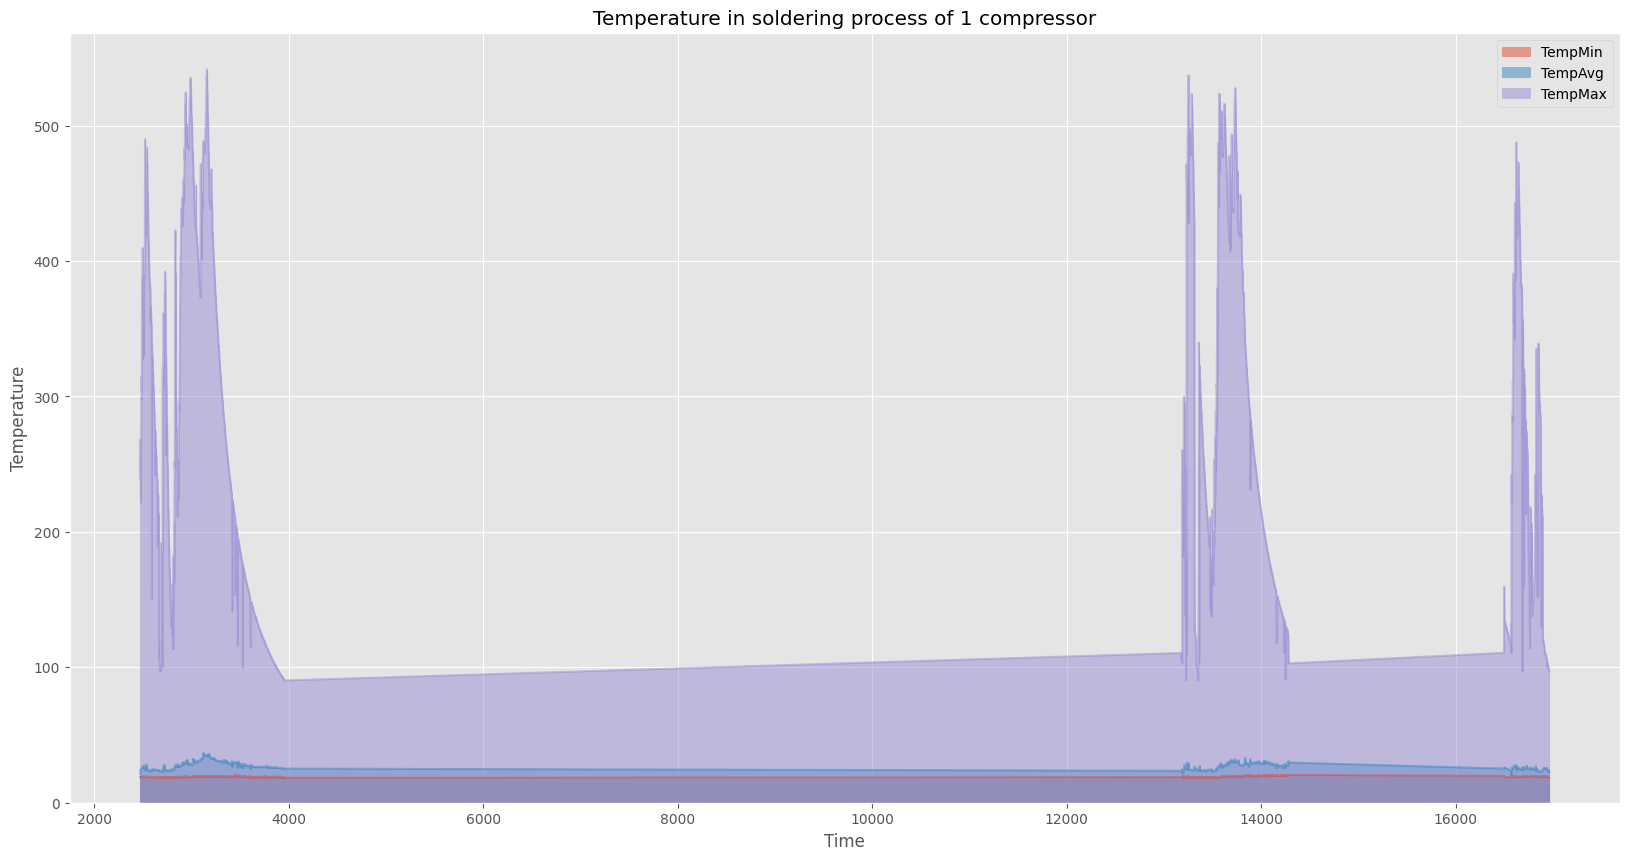

In [46]:
df.plot(kind='area',
             stacked=False,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Temperature in soldering process of 1 compressor')
plt.ylabel('Temperature')
plt.xlabel('Time')

plt.show()

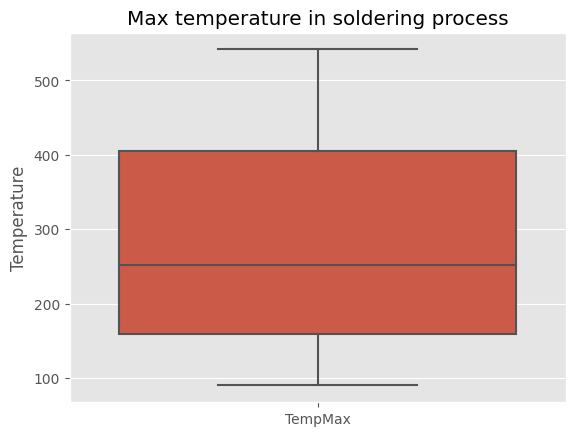

In [60]:
sns.boxplot ( data = df.loc[ :, ['Time', 'TempMax']
                           ]
            )

plt.xticks( fontsize = 10,
           rotation = 0)
plt.title('Max temperature in soldering process')
plt.ylabel('Temperature')
plt.show(block = True)


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


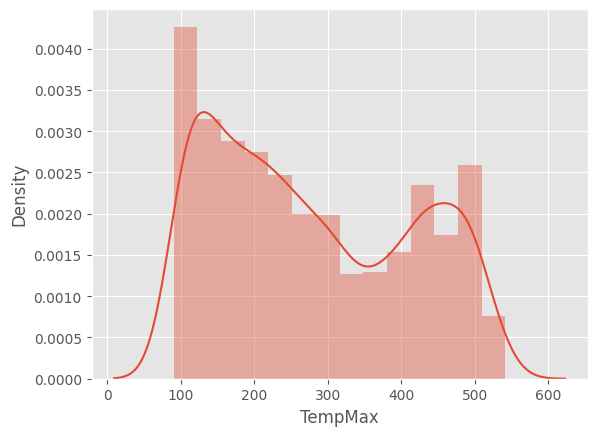

In [62]:
sns.distplot (df.TempMax)

(array([228., 206., 186., 146., 153., 134., 159., 128., 131., 106., 108.,
        105.,  88.,  76.,  57.,  63.,  90.,  70., 120., 142.,  84., 136.,
        116.,  70.,  29.]),
 array([ 90.2  , 108.252, 126.304, 144.356, 162.408, 180.46 , 198.512,
        216.564, 234.616, 252.668, 270.72 , 288.772, 306.824, 324.876,
        342.928, 360.98 , 379.032, 397.084, 415.136, 433.188, 451.24 ,
        469.292, 487.344, 505.396, 523.448, 541.5  ]),
 <a list of 25 Patch objects>)

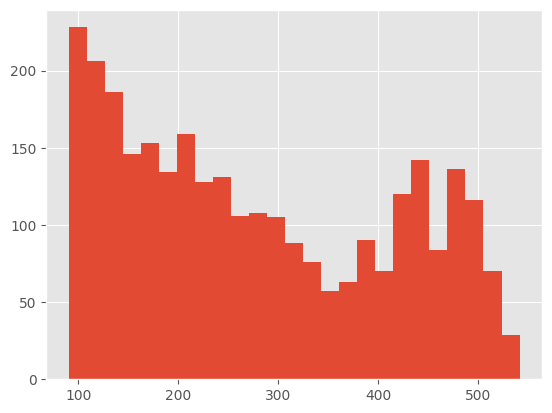

In [64]:
plt.hist(df['TempMax'], bins=25)

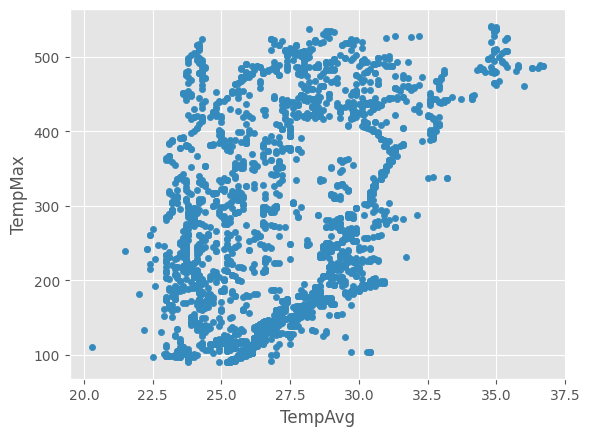

In [66]:
ax = df.plot.scatter(x="TempAvg", y="TempMax")